In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.1 MB/s eta 0:00:00


Saving Mall_Customers.csv to Mall_Customers (1).csv


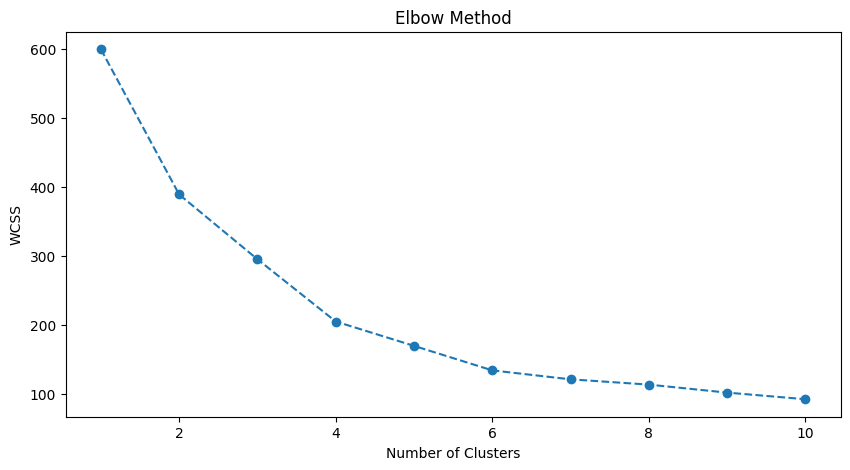

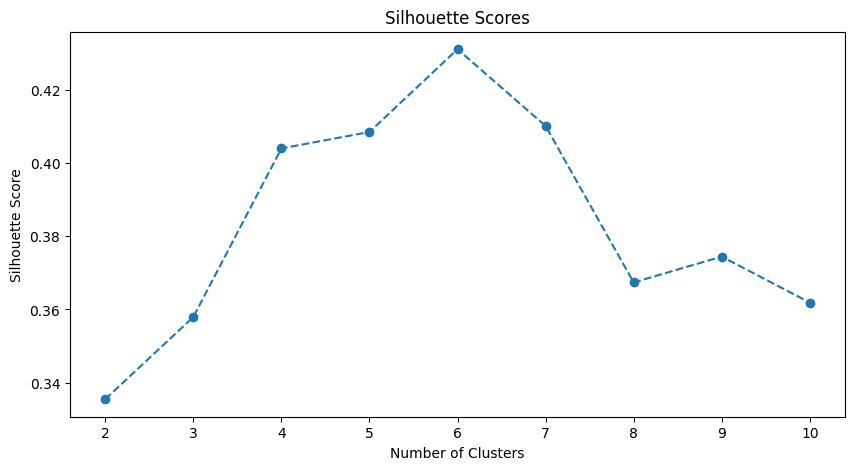

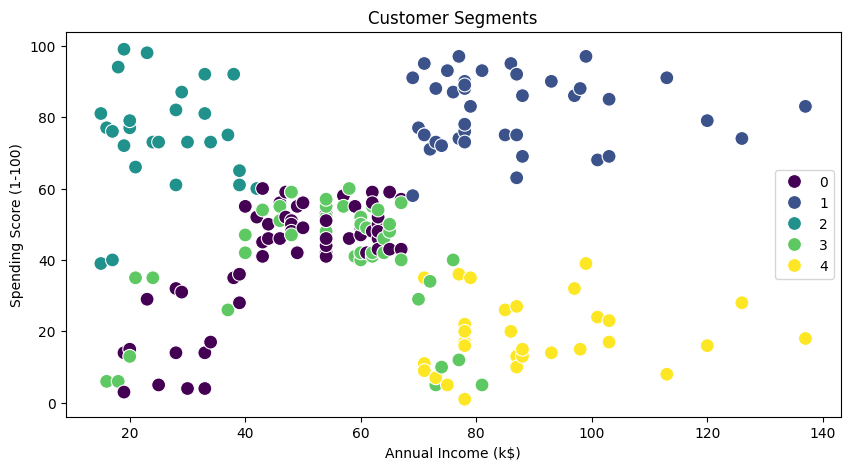

interactive(children=(Dropdown(description='x_axis', options=('Age', 'Annual Income (k$)', 'Spending Score (1-…

In [3]:
# Step 2: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from google.colab import files

# Step 3: Load the Dataset
uploaded = files.upload()
df = pd.read_csv('Mall_Customers.csv')

# Step 4: Explore and Preprocess the Data
# Display first few rows
df.head()

# Check for missing values
df.isnull().sum()

# Encode categorical variables (e.g., Gender)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Determine the Optimal Number of Clusters
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Optimal number of clusters (e.g., based on Elbow Method or highest Silhouette Score)
optimal_clusters = 5

# Step 6: Apply K-means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 7: Visualize the Clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Step 8: Develop an Interactive Interface with ipywidgets
def plot_clusters(x_axis, y_axis):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=x_axis, y=y_axis, hue='Cluster', data=df, palette='viridis', s=100)
    plt.title(f'Customer Segments: {x_axis} vs {y_axis}')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.legend()
    plt.show()

interact(plot_clusters, x_axis=features, y_axis=features);
